In [1]:
import pandas as pd
import glob

csv_files = glob.glob("../results/classic/classical_results_*.csv")
classic_df = [pd.read_csv(file) for file in csv_files]
classic_df_final = pd.concat(classic_df, ignore_index=True)
classic_df_final = classic_df_final.sort_values(by='train_size').reset_index(drop=True)
classic_df_final.to_csv("../results/classical_combined.csv", index=False)


In [2]:

csv_files = glob.glob("../results/fine-tuning/fine_tuning_metrics_*_50e.csv")
fine_tuning_df = [pd.read_csv(file) for file in csv_files]
fine_tuning_df_final = pd.concat(fine_tuning_df, ignore_index=True)
fine_tuning_df_final.head(10)
fine_tuning_df_final = fine_tuning_df_final.sort_values(by='size').reset_index(drop=True)
fine_tuning_df_final.to_csv("../results/fine_tuning_combined.csv", index=False)

In [3]:

csv_files = glob.glob("../results/transfer/transfer_metrics_*_50e.csv")
transfer_df = [pd.read_csv(file) for file in csv_files]
transfer_df_final = pd.concat(transfer_df, ignore_index=True)
transfer_df_final.head(10)
transfer_df_final = transfer_df_final.sort_values(by='size').reset_index(drop=True)
transfer_df_final.to_csv("../results/transfer_combined.csv", index=False)

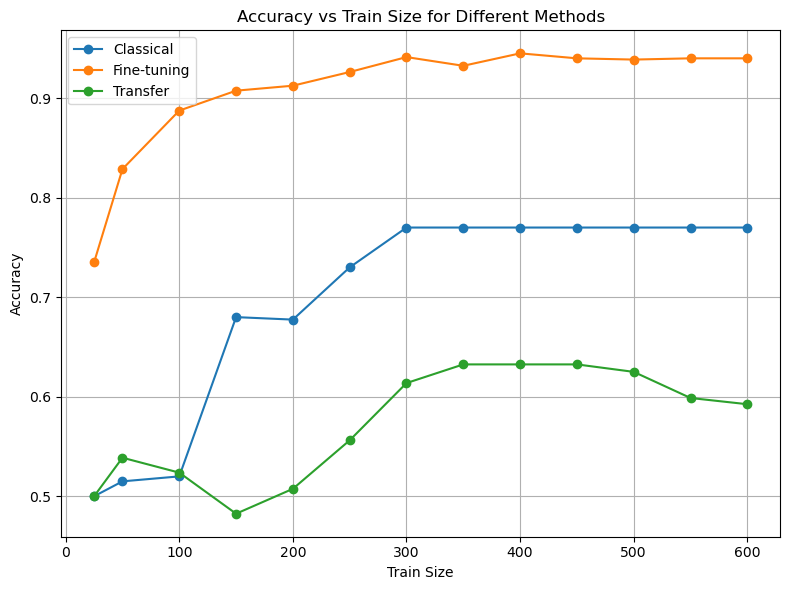

In [6]:
import matplotlib.pyplot as plt

# Load the combined CSVs
classic = pd.read_csv("../results/classical_combined.csv")
fine_tuning = pd.read_csv("../results/fine_tuning_combined.csv")
transfer = pd.read_csv("../results/transfer_combined.csv")

plt.figure(figsize=(8, 6))

plt.plot(classic['train_size'], classic['accuracy'], marker='o', label='Classical')
plt.plot(fine_tuning['size'], fine_tuning['eval_accuracy'], marker='o', label='Fine-tuning')
plt.plot(transfer['size'], transfer['eval_accuracy'], marker='o', label='Transfer')

plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Train Size for Different Methods')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
